# 第2章 単純な機械学習アルゴリズムのトレーニング


In [3]:
import numpy as np

In [13]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            # 要素ごとに
            for xi, target in zip(X, y):
                # update=delta(w)
                update = self.eta * (target - self.predict(xi))
                # がく、びら分のwそれぞれに、その特徴量分誤差掛けて足しておく
                self.w_[1:] += update * xi
                # bias unit
                self.w_[0] += update
                # 更新分がないwの数
                errors += int(update != 0.01)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        # z=(wi+w0)Tx
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [16]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
import matplotlib.pyplot as plt

In [18]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

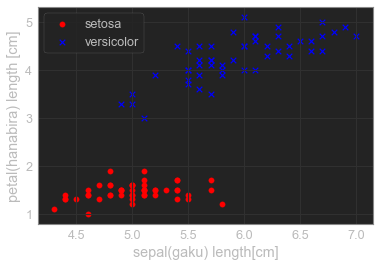

In [19]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal(gaku) length[cm]')
plt.ylabel('petal(hanabira) length [cm]')
plt.legend(loc='upper left')
plt.show()

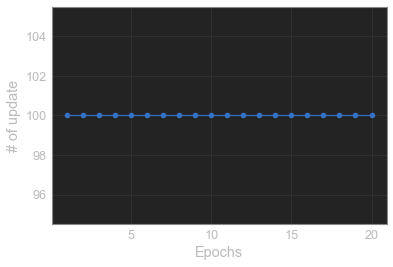

In [21]:
ppn = Perceptron(eta=0.01, n_iter=20)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('# of update')
plt.show()

In [22]:
from matplotlib.colors import ListedColormap

In [33]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))
    print(xx1)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(Z)
    Z = Z.reshape(xx1.shape)
    print(Z.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                            y=X[y == cl, 1],
                            alpha=0.8,
                            c=colors[idx],
                            marker=markers[idx],
                            label=classifier,
                            edgecolor='black')

[[3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 ...
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]
 [3.3  3.32 3.34 ... 7.94 7.96 7.98]]
[-1 -1 -1 ...  1  1  1]
(305, 235)


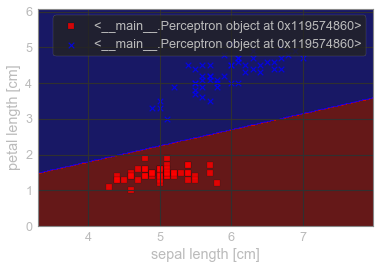

In [34]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='best')
plt.show()